# Project Exploring the Bitcoin Cryptocurrency Market


## 1.Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility

In [1]:
# importing pandas
import pandas as pd

#importing matplotlib 

import matplotlib.pyplot as plt

# Reading datasets cryptocurrency.csv into pandaas
bitcoin=pd.read_csv("cryptocurrency.csv")

bitcoin


,,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000e+00,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,3.617670e-02,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,1.200500e-01,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,4.241800e-04,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,1.932000e-05,0.241754,5,XRP,9.999309e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,1321,NaN,NaN,turbocoin,1512368664,NaN,NaN,TurboCoin,NaN,NaN,8.12,1.000000e-08,0.000114,1322,TURBO,NaN
1322,1322,NaN,NaN,birds,1512535772,NaN,NaN,Birds,NaN,10.62,-42.10,1.000000e-08,0.000122,1323,BIRDS,NaN
1323,1323,NaN,NaN,bitcoincashscrypt,1512548078,NaN,NaN,BitcoinCashScrypt,-0.37,-37.39,-27.69,5.000000e-07,0.006202,1324,BCCS,2.502380e+06
1324,1324,NaN,NaN,swisscoin,1512540278,NaN,NaN,Swisscoin,NaN,4.39,-22.84,1.000000e-08,0.000123,1325,SIC,1.020000e+10


In [2]:
# Selecting the 'id' and 'market_cap_usd' columns
b1=bitcoin[['id','market_cap_usd']]
print(b1)

                     id  market_cap_usd
0               bitcoin    2.130493e+11
1              ethereum    4.352945e+10
2          bitcoin-cash    2.529585e+10
3                  iota    1.475225e+10
4                ripple    9.365343e+09
...                 ...             ...
1321          turbocoin             NaN
1322              birds             NaN
1323  bitcoincashscrypt             NaN
1324          swisscoin             NaN
1325          faceblock             NaN

[1326 rows x 2 columns]


In [3]:
# Counting number of values  
print(f"id_count: {b1['id'].count()}\nmarket_cap_usd_count: {b1['market_cap_usd'].count()}")


id_count: 1326
market_cap_usd_count: 1031


## 2.Discard the cryptocurrencies without a market capitalization

In [4]:
# Filtering out rows without  a market capitalization
b1=bitcoin.dropna(subset=['market_cap_usd'])
print('id_count: ',b1['id'].count(),'\n','market_cap-usd_count: ',b1['market_cap_usd'].count(),sep='')


id_count: 1031
market_cap-usd_count: 1031


## 3.How big is Bitcoin compared with the rest of the cryptocurrencies?

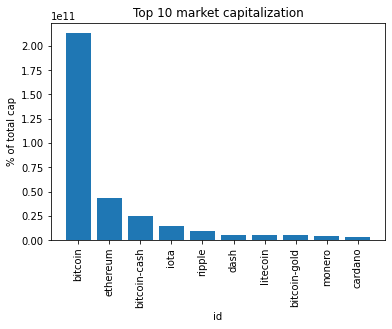

In [5]:
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
#  Selecting the first 10 rows and setting the index
rows10=bitcoin.iloc[0:10].set_index('id')
 
# Calculating market_cap_perc
rows10=rows10.assign(market_cap_perc=lambda x:(x.market_cap_usd/bitcoin.market_cap_usd.sum()*100))
# Plotting the barplot with the title defined above
plt.bar(rows10.index.values,rows10['market_cap_usd'])
plt.xticks(rotation=90)
plt.title('Top 10 market capitalization')
plt.xlabel('id')

# Annotating the y axis with the label defined above
plt.ylabel(TOP_CAP_YLABEL)
plt.show()

## 4. Making the plot easier to read and more informative

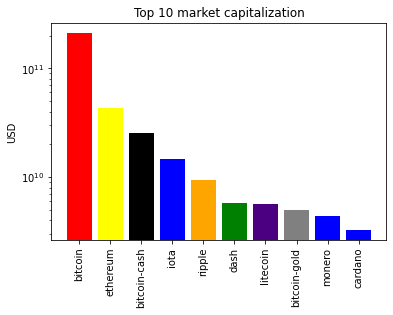

In [6]:
col = ['red', 'yellow', 'black', 'blue', 'orange','green','indigo','grey','blue','blue']
#Plotting market_cap_usd as before but adding the colors
plt.bar(first10.index.values,first10['market_cap_usd'],color=col )
plt.xticks(rotation=90)
plt.title('Top 10 market capitalization')
#scaling the y-axis  
plt.yscale('log')
plt.xlabel('id')

# Annotating the y axis with 'USD'
plt.ylabel('USD')
# Final touch! Removing the xlabel as it is not very informative
plt.xlabel('')
plt.show()

## 5.What is going on?! Volatility in cryptocurrencies

In [7]:
volatility = bitcoin[['id', 'percent_change_24h', 'percent_change_7d']]
## Setting the index to 'id' and dropping all NaN rows
volatility=volatility.set_index('id').dropna()
# Sorting the DataFrame by percent_change_24h in ascending order
volatility=volatility.sort_values(by='percent_change_24h',ascending=True)

#checking the first few rows
volatility.head(10)
 


,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


## 6.Well, we can already see that things are a bit crazy

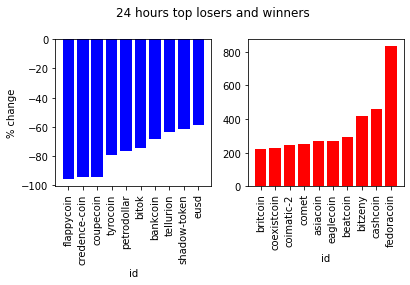

In [8]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_member_plot(input_dataset,title):
# Making the subplot and the figure for two side by side plots
    plt.subplot(1,2,1)
    plt.bar(input_dataset[0:10].index.values,input_dataset[0:10],color='blue')
    plt.xticks(rotation=90)
# Setting the figure's main title to the text passed as parameter
    plt.suptitle(title)
# Setting the ylabel to '% change'
    plt.ylabel('% change')
    plt.xlabel("id")
# Same as above, but for the top 10 winners
    plt.subplot(1,2,2)
    plt.bar(input_dataset[-10:].index.values,input_dataset[-10:],color='red')
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.xlabel("id")
    plt.show()
    
DTITLE='24 hours top losers and winners'
# Calling the function above with the 24 hours period series and title DTITLE
top10_member_plot(volatility.percent_change_24h,DTITLE)

## 7.Ok, those are... interesting. Let's check the weekly Series too

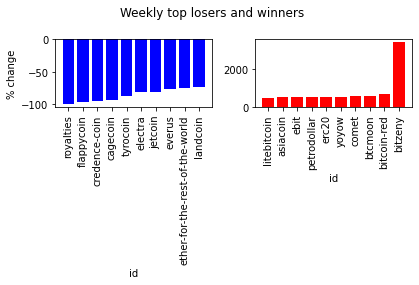

In [9]:
volatility_weekly= volatility.sort_values(by='percent_change_7d', ascending=True)
WTITLE = "Weekly top losers and winners"
# Calling the top10_subplot function
top10_member_plot(volatility_weekly.percent_change_7d,WTITLE)

## 8. How small is small?

In [10]:
# Selecting everything bigger than 10 billion
largecaps=bitcoin[bitcoin['market_cap_usd'] >= 10000000000][['id','market_cap_usd']]
# printing out largecaps
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


## 9. Most coins are tiny

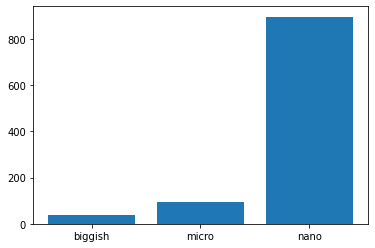

In [31]:
cap=pd.read_csv('cryptocurrency.csv')
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
big = capcount('market_cap_usd > 3E+8')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 and market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = [big, micro, nano]

# Plotting them with matplotlib 
plt.bar(height=values, x=LABELS);
